In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

from finch import FINCH

### Generate test dataset

In [2]:
n_samples = 5000
n_clusters = 5
random_state = 42

X, y = datasets.make_blobs(n_samples=n_samples, centers=n_clusters, random_state=random_state)

## Basic usage

Optional paramters for the FINCH class are: 
* metric (default='euclidean'): The used distance metric
* n_jobs (default=1): The number of processes to start -1 means use all processors

In [3]:
fin = FINCH()
fin.fit(X)

# results of the paritionings are stored in the fin.partitions
# print(fin.partitions)

FINCH Partitionings
-------------------
Clusters in 0 partition: 1535
Clusters in 1 partition: 401
Clusters in 2 partition: 94
Clusters in 3 partition: 16
Clusters in 4 partition: 5
Clusters in 5 partition: 2


In [4]:
# Apply the FINCH algorithm and returns a reasonable partitioning labels based on the silhouette coeffcient
fin = FINCH()
labels = fin.fit_predict(X)

FINCH Partitionings
-------------------
Clusters in 0 partition: 1535 with average silhouette score 0.37
Clusters in 1 partition: 401 with average silhouette score 0.22
Clusters in 2 partition: 94 with average silhouette score 0.14
Clusters in 3 partition: 16 with average silhouette score 0.24
Clusters in 4 partition: 5 with average silhouette score 0.67
Clusters in 5 partition: 2 with average silhouette score 0.47


__Potential interpretations for silhouette score__

* 0.71-1.00: Strong structure has been found
* 0.51-0.70: Reasonable structure has been found
* 0.26-0.50: The structure is weak and could be artificial. 
* <0.25: No substantial structure has been found

In [5]:
# Plot the results 
def plot(data, labels):
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
    
    for i in range(-1, len(set(labels))):
        if i == -1:
            col = [0, 0, 0, 1]
        else:
            col = colors[i % len(colors)]
        
        clust = data[np.where(labels==i)]
        plt.scatter(clust[:,0], clust[:,1], c=[col], s=1)
    plt.show()

    return None

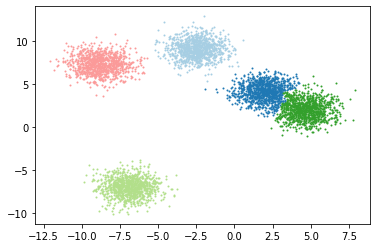

In [6]:
plot(X, labels)

### Other toy dataset examples

FINCH Partitionings
-------------------
Clusters in 0 partition: 1508 with average silhouette score 0.36
Clusters in 1 partition: 406 with average silhouette score 0.23
Clusters in 2 partition: 102 with average silhouette score 0.14
Clusters in 3 partition: 17 with average silhouette score 0.17
Clusters in 4 partition: 3 with average silhouette score 0.75


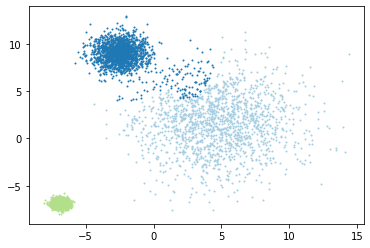

In [7]:
X, y = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 3.0, 0.3], random_state=random_state)
# Finch 
fin = FINCH()
labels = fin.fit_predict(X)

plot(X, labels)

FINCH Partitionings
-------------------
Clusters in 0 partition: 1533 with average silhouette score 0.37
Clusters in 1 partition: 406 with average silhouette score 0.25
Clusters in 2 partition: 98 with average silhouette score 0.20
Clusters in 3 partition: 23 with average silhouette score 0.28
Clusters in 4 partition: 6 with average silhouette score 0.41
Clusters in 5 partition: 2 with average silhouette score 0.48


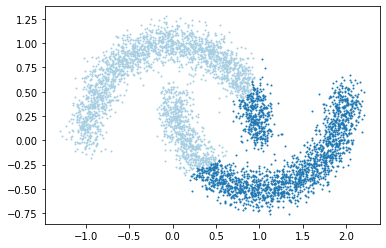

In [8]:
X, y = datasets.make_moons(n_samples=n_samples, noise=.1, random_state=random_state)

# Finch 
fin = FINCH()
labels = fin.fit_predict(X)

plot(X, labels)

FINCH Partitionings
-------------------
Clusters in 0 partition: 1527 with average silhouette score 0.37
Clusters in 1 partition: 383 with average silhouette score 0.25
Clusters in 2 partition: 104 with average silhouette score 0.27
Clusters in 3 partition: 35 with average silhouette score 0.30
Clusters in 4 partition: 8 with average silhouette score 0.27
Clusters in 5 partition: 3 with average silhouette score 0.39


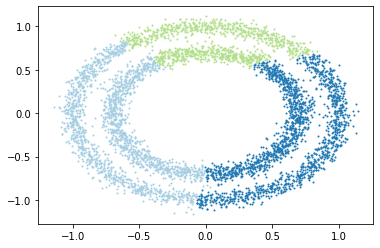

In [9]:
X, y = datasets.make_circles(n_samples=n_samples, factor=0.7, noise=.05, random_state=random_state)

# Finch 
fin = FINCH()
labels = fin.fit_predict(X)

plot(X, labels)